Question: You are given a Cricket Dataset. Create a Python Notebook and perform the Exploratory Data Analysis. You should do the following.
1.	Perform basic data quality assessment including missing value analysis and incorrect value analysis.
2.	Change column names wherever necessary.
3.	To Perform univariate analysis, plot the most relevant chart for each attribute) .You may Plot Histograms for categorical attributes and Boxplots or line charts for all numeric attributes.
4.	Keep the flow of python notebook systematic – Start from commands allow which you to know your data (Try to use all such commands); and then handle missing values followed by univariate analysis.
5.	Submit a python notebook and a short report mentioning data quality issues found and how you removed those issues.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\10\\OneDrive\\Desktop\\data science\\FTI\\upload'

In [3]:
# data = pd.read_csv('C:\\Users\\ashee\\OneDrive\\Desktop\\data science\\FTI\\m2_w2_Cricket.csv')
data = pd.read_csv('C:\\Users\\10\\OneDrive\\Desktop\\data science\\FTI\\m2_w2_Cricket.csv')

In [4]:
data.head()

,ConsecutiveWins,Season,Opposition_Others,Country,Ground,Home_Ground,Day_Night,PitchReport,BattingFirst,Combination Changed,Pak_Win
0,0,Summer,New Zealand,New Zealand,Wellington,No,Yes,bouncy,Yes,No,No
1,0,Summer,New Zealand,South Africa,Queenstown,No,No,bouncy,Yes,No,No
2,0,Summer,New Zealand,New Zealand,Christchurch,No,Yes,bouncy,Yes,No,Yes
3,1,Summer,New Zealand,New Zealand,Napier,No,Yes,bouncy,No,No,Yes
4,2,Summer,New Zealand,New Zealand,Hamilton,No,Yes,bouncy,Yes,No,Yes


In [5]:
pd.set_option('Display.Max_Columns',50)

In [6]:
data.columns

Index(['ConsecutiveWins', 'Season', 'Opposition_Others', 'Country', 'Ground',
       'Home_Ground', 'Day_Night', 'PitchReport', 'BattingFirst',
       'Combination Changed ', 'Pak_Win'],
      dtype='object')

In [7]:
data.rename(columns= {'Combination Changed ':'CombinationChanged'}, inplace = True)

In [8]:
data.columns

Index(['ConsecutiveWins', 'Season', 'Opposition_Others', 'Country', 'Ground',
       'Home_Ground', 'Day_Night', 'PitchReport', 'BattingFirst',
       'CombinationChanged', 'Pak_Win'],
      dtype='object')

### checking null values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 11 columns):
ConsecutiveWins       95 non-null object
Season                94 non-null object
Opposition_Others     94 non-null object
Country               95 non-null object
Ground                95 non-null object
Home_Ground           94 non-null object
Day_Night             95 non-null object
PitchReport           95 non-null object
BattingFirst          94 non-null object
CombinationChanged    12 non-null object
Pak_Win               94 non-null object
dtypes: object(11)
memory usage: 8.2+ KB


#### it seems that there are some null values  in 1, 2, 5, 8, 10 and too many null values in 9 and consecutive wins should be and int instead of and object

### Checking the characteristics of data

In [10]:
data.describe()

,ConsecutiveWins,Season,Opposition_Others,Country,Ground,Home_Ground,Day_Night,PitchReport,BattingFirst,CombinationChanged,Pak_Win
count,95,94,94,95,95,94,95,95,94,12,94
unique,10,4,10,10,37,1,2,6,2,2,4
top,0,Spring,Sri Lanka,UAE,Dhaka,No,Yes,dry,No,No,Yes
freq,43,35,22,26,10,94,60,39,47,9,49


#### there are no outliers present in the table

### Looking at each Column individually 

In [11]:
for i in range(len(data.columns)):
    print(data.columns[i])
    print(data[data.columns[i]].unique(),'\n')

ConsecutiveWins
['0' '1' '2' '3' 'A' '4' 'B' '6' '5' '7'] 

Season
['Summer' 'Winter' 'Spring' 'Autumn' nan] 

Opposition_Others
['New Zealand' 'Others' 'Sri Lanka' 'Zimbabwe' 'Australia' 'West Indies'
 'India' nan 'Bangladesh' 'England' 'South Africa'] 

Country
['New Zealand' 'South Africa' 'SriLanka' 'Bandladesh' 'India'
 'West Indies' 'Others' 'Zimbabwe' 'UAE' 'England'] 

Ground
['Wellington' 'Queenstown' 'Christchurch' 'Napier' 'Hamilton' 'Auckland'
 'Hambantota' 'Colombo (RPS)' 'Pallekele' 'Dhaka' 'Mohali' 'Gros Islet'
 'Bridgetown' 'Providence' 'Belfast' 'Bulawayo' 'Harare' 'Dubai (DSC)'
 'Sharjah' 'Abu Dhabi' 'Chittagong' 'Chennai' 'Kolkata' 'Delhi'
 'Bloemfontein' 'Centurion' 'Johannesburg' 'Durban' 'Benoni' 'Edinburgh'
 'Dublin' 'The Oval' 'Birmingham' 'Cape Town' 'Port Elizabeth' 'Fatullah'
 'Dambulla'] 

Home_Ground
['No' nan] 

Day_Night
['Yes' 'No'] 

PitchReport
['bouncy' 'dry' 'slow' 'green' 'glow' 'shy'] 

BattingFirst
['Yes' 'No' nan] 

CombinationChanged
['No' 'Yes'

In [12]:
data.ConsecutiveWins= pd.to_numeric(data.ConsecutiveWins, errors='coerce')
data.ConsecutiveWins.unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  6.,  5.,  7.])

In [13]:
my_list = ['Yes','No',np.nan]
for values in data.Pak_Win:
    if values not in my_list:
        data.loc[np.where(data.Pak_Win == values)[0][0], 'Pak_Win']=np.nan

In [14]:

x=np.where(data.Pak_Win == 'Yes')
x[0][0]

2

In [17]:
data.Pak_Win.unique()

array(['No', 'Yes', nan], dtype=object)

now there are no erranous values data only null values left

In [21]:
data.shape

(95, 11)

In [29]:
data.isnull().sum()

ConsecutiveWins        2
Season                 1
Opposition_Others      1
Country                0
Ground                 0
Home_Ground            1
Day_Night              0
PitchReport            0
BattingFirst           1
CombinationChanged    83
Pak_Win                3
dtype: int64

#### deleting CombinationChanged column because it has too many null values

In [47]:
data.drop(['CombinationChanged'], axis =1, inplace = True)

KeyError: "['CombinationChanged'] not found in axis"

In [48]:
data

,ConsecutiveWins,Season,Opposition_Others,Country,Ground,Home_Ground,Day_Night,PitchReport,BattingFirst,Pak_Win
0,0.0,Summer,New Zealand,New Zealand,Wellington,No,Yes,bouncy,Yes,No
1,0.0,Summer,New Zealand,South Africa,Queenstown,No,No,bouncy,Yes,No
2,0.0,Summer,New Zealand,New Zealand,Christchurch,No,Yes,bouncy,Yes,Yes
3,1.0,Summer,New Zealand,New Zealand,Napier,No,Yes,bouncy,No,Yes
4,2.0,Summer,New Zealand,New Zealand,Hamilton,No,Yes,bouncy,Yes,Yes
5,3.0,Summer,New Zealand,New Zealand,Auckland,No,No,bouncy,No,No
6,0.0,Winter,Others,SriLanka,Hambantota,No,Yes,dry,Yes,Yes
7,1.0,Winter,Sri Lanka,SriLanka,Colombo (RPS),No,Yes,dry,Yes,Yes
9,3.0,Autumn,New Zealand,SriLanka,Pallekele,No,Yes,dry,No,No
11,1.0,Autumn,Australia,SriLanka,Colombo (RPS),No,Yes,dry,No,Yes


#### Now dropping null values in all columns

In [49]:
data.dropna(inplace = True)

In [50]:
data.shape

(89, 10)

In [51]:
data.isnull().sum()

ConsecutiveWins      0
Season               0
Opposition_Others    0
Country              0
Ground               0
Home_Ground          0
Day_Night            0
PitchReport          0
BattingFirst         0
Pak_Win              0
dtype: int64

## Graphs

In [52]:
data.ConsecutiveWins.value_counts()

0.0    41
1.0    23
2.0    12
3.0     7
6.0     2
4.0     2
7.0     1
5.0     1
Name: ConsecutiveWins, dtype: int64

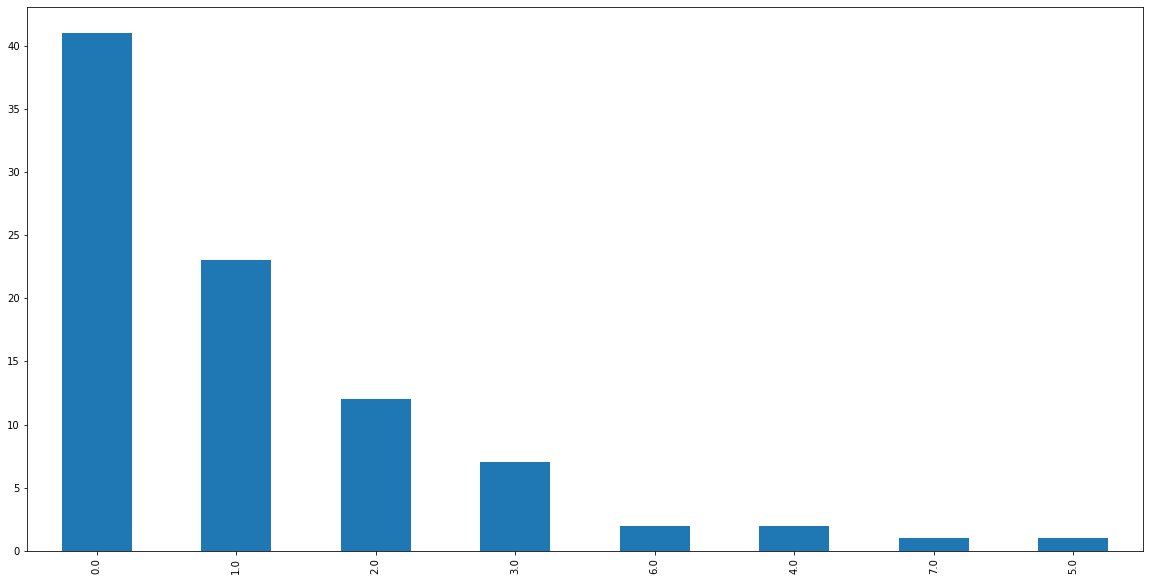

In [53]:
data.ConsecutiveWins.value_counts().plot(kind = 'bar', figsize =(20,10))

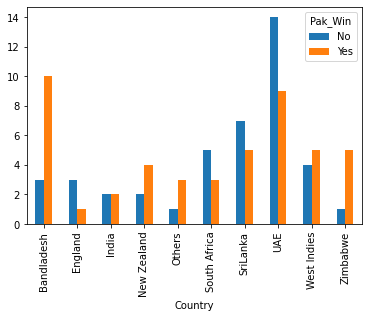

In [62]:
pd.crosstab(data['Country'], data['Pak_Win'],normalize=False).plot(kind='bar')

There are 5 countries in which pakistan has high number of wins.

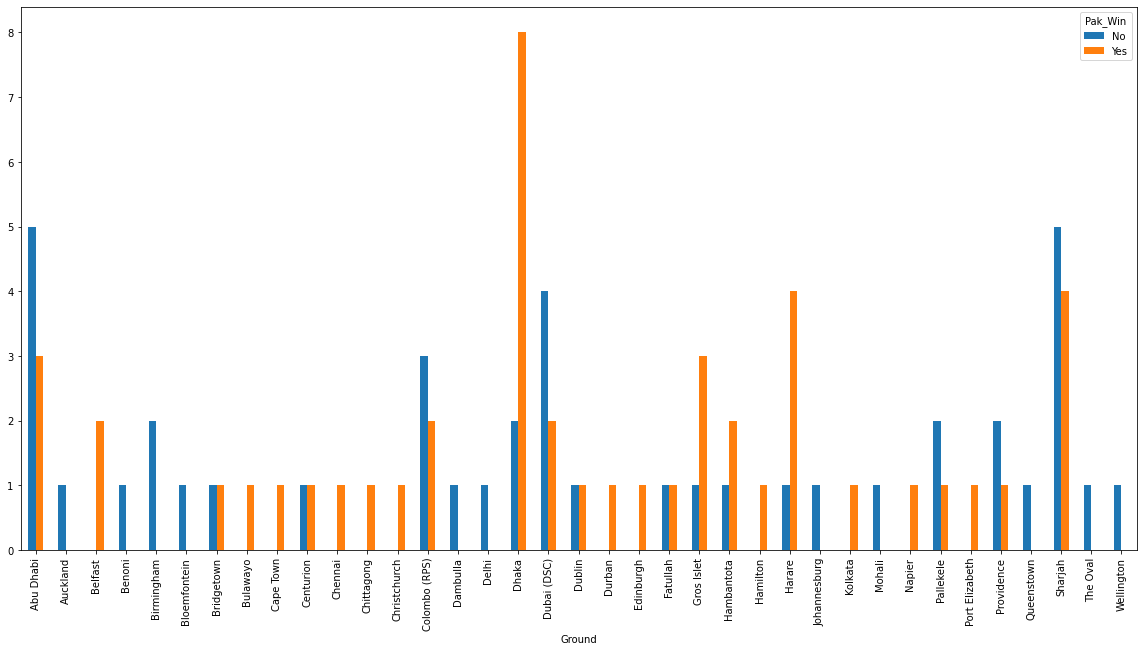

In [65]:
pd.crosstab(data['Ground'], data['Pak_Win'],normalize=False).plot(kind='bar', figsize = (20,10))

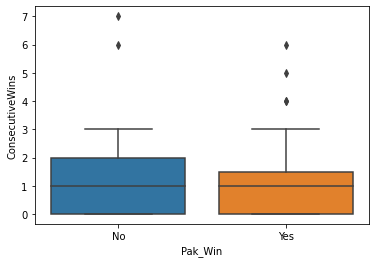

In [61]:
sns.boxplot(x = data.Pak_Win, y = data['ConsecutiveWins'])